## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Play Store Data.csv')

## Data Overview

In [4]:
print(df.shape)
df.head()

(10841, 13)


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Except "Rating" all other features are Object data type.
We will convert "Reviews, Size, Installs and Price" into numerical Dtype.

In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

"Rating" column has 1474 null values

In [7]:
df['App'].duplicated().sum()

1181

1181 Apps are duplicated entries in the dataset

## Data Cleaning

In [8]:
# Removing Duplicates of App

In [9]:
df['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

1181 Apps are found to be duplicates.

In [10]:
df.loc[df['App'].duplicated()]

App       Category  Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2   80805   
236                                   Box       BUSINESS     4.2  159872   
239                    Google My Business       BUSINESS     4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4   31614   
261             join.me - Simple Meetings       BUSINESS     4.0    6989   
...                                   ...            ...     ...     ...   
10715                  FarmersOnly Dating         DATING     3.0    1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4   36981   
10730                         FP Notebook        MEDICAL     4.5     410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5   33599   
10768                                AAFP        MEDICAL     3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [11]:
#Dropping the duplicates
df = df.drop_duplicates('App')

In [12]:
df.shape

(9660, 13)

In [13]:
#Finding null values
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
#Dropping the null values would result in loss of ~10% data
#To minimize data loss we will fill the null values under "Rating" column by mean through category wise.

In [15]:
df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'),inplace=True)

In [16]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [17]:
df.dropna(inplace=True) #dropping the other null rows

In [18]:
#Converting Install coloumn to int type
df['Installs']=df['Installs'].apply(lambda x:x.replace('+',''))
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))
df['Installs']=df['Installs'].astype(int)

In [19]:
df['Size'].unique() #Unique values in Size coloumn

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
#Converting the Size column into float type and in Megabytes format
#Replacing the string "Varies with device" into NaN value which can be later filled by mean category wise

df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [21]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('M',''))
df['Size']=df['Size'].apply(lambda x:str(x).replace('k','e-3')) #replacing k(kilobytes) into Megabytes format

In [22]:
df['Size']=df['Size'].astype(float) #converting into float 

In [23]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True) 
# filling the NaN values with mean of size of the apps by its category respectively

In [24]:
#To convert object into numerical data type
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))

In [25]:
df['Price']=df['Price'].astype(float)

In [26]:
df['Reviews']=df['Reviews'].astype(int) #Converting reviews column into int type

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int32  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int32  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 979.9+ KB


## Data Visualization

### Basic EDA

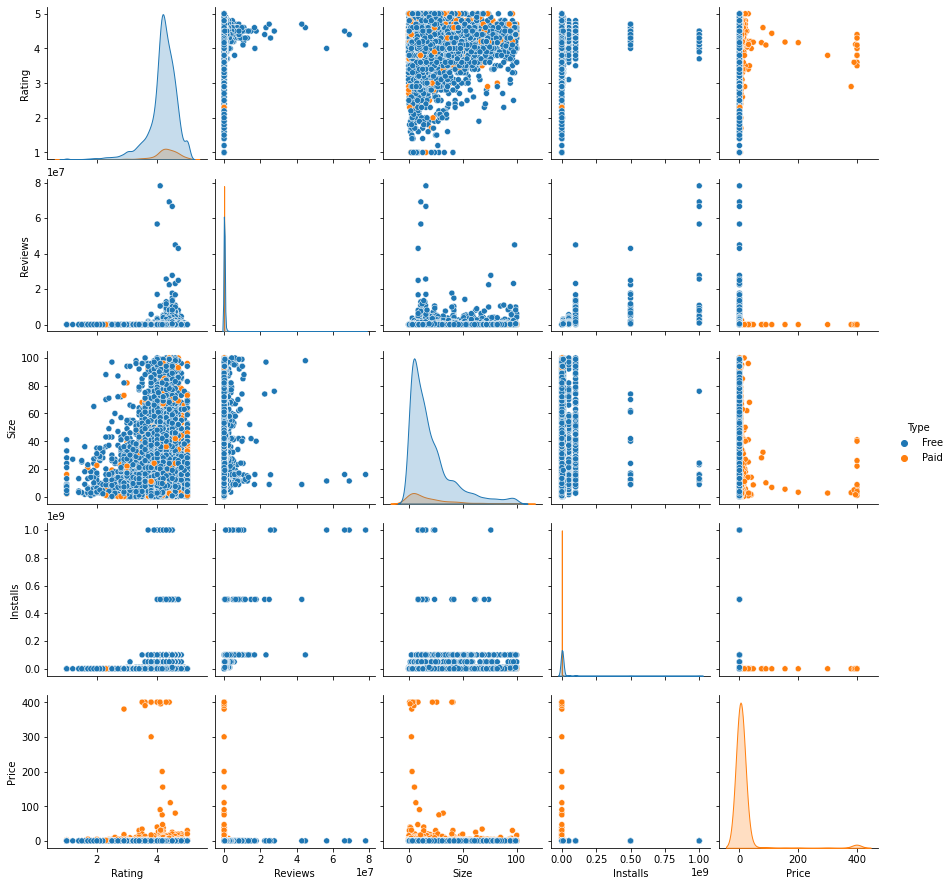

In [28]:
sns.pairplot(df,hue='Type')

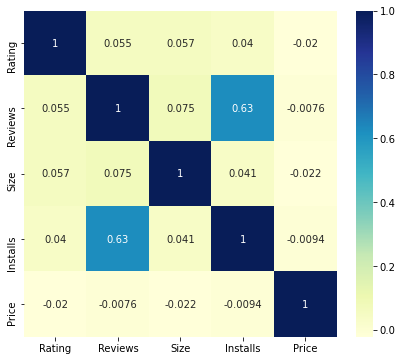

In [29]:
# Feature Correlations
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

The Findings are :
1. Looks like Rating and Reviews are highly postive correlated
2. Installs and Size are correlated postive as well
3. Most of them columns are correlated negatively with Price column

### Content Rating

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


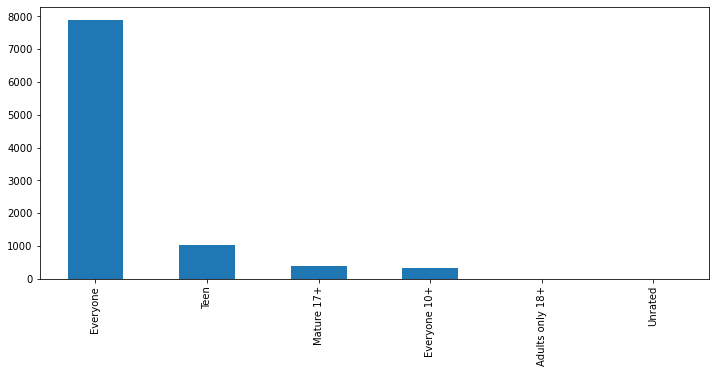

In [30]:
#Finding the "Content Rating"
plt.figure(figsize=(12,5))
df['Content Rating'].value_counts().plot(kind='bar')
print(df['Content Rating'].value_counts())


Most of the Apps are rated "Everyone". Few apps in "Adults only 18+" and "Unrated"

### Categories

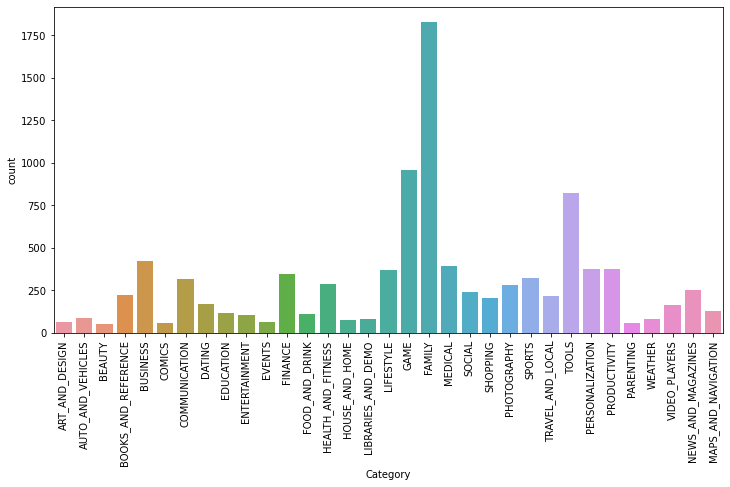

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

Majority of the apps are in Family category

### Categories

<AxesSubplot:xlabel='Category', ylabel='count'>

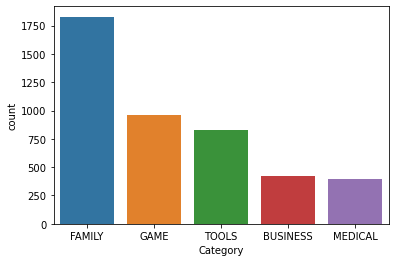

In [32]:
sns.countplot(x=df['Category'],order=pd.value_counts(df['Category']).iloc[:5].index)

Top 5 Categories are :
1. Family
2. Game
3. Tools
4. Business
5. Medical

### Type

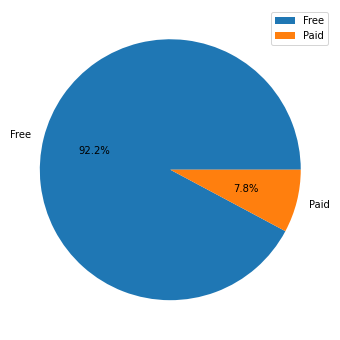

In [33]:
labels =df['Type'].value_counts(sort = True).index
plt.figure(figsize=(6,6))
plt.pie(df['Type'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

92% of apps listed in the PlayStore are Free

#### Percentage of Free vs Paid by Category

In [34]:
#using plotly's interactive sunburst chart
fig1 = px.sunburst(df, path=['Category', 'Type'],color='Type',color_discrete_sequence=px.colors.qualitative.Pastel,
                 title='Percentage of Free vs Paid by Category',width=800, height=400)
fig1.update_traces(textinfo='label+percent entry')
fig1.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig1.show()

Medical and Personalization Categories have the more paid apps than free(>20%).

### Price distribution in Paid Apps

In [35]:
paid_apps = df[df['Type']=='Paid']

<AxesSubplot:xlabel='Price', ylabel='Count'>

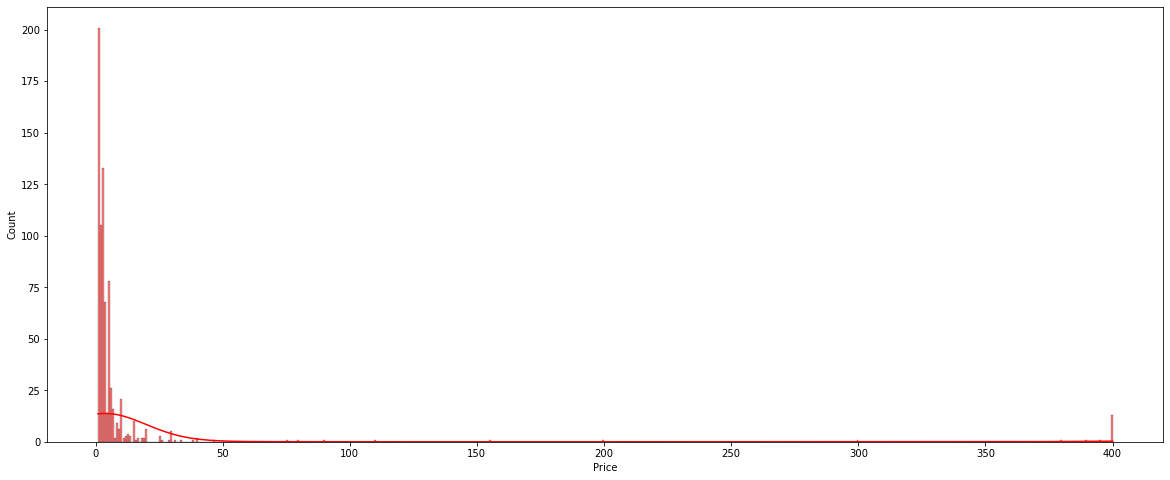

In [36]:
plt.figure(figsize=(20,8))
sns.histplot(paid_apps['Price'],kde=True,color='red')

Looks like most of the apps are priced below 50usd

(0.0, 50.0)

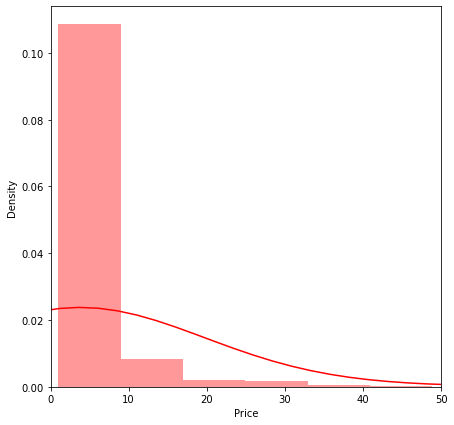

In [37]:
plt.figure(figsize=(7,7))
sns.distplot(paid_apps['Price'],kde=True,color='red')
plt.xlim(0,50)

On closer inspection, majority of the apps are priced below 10usd 

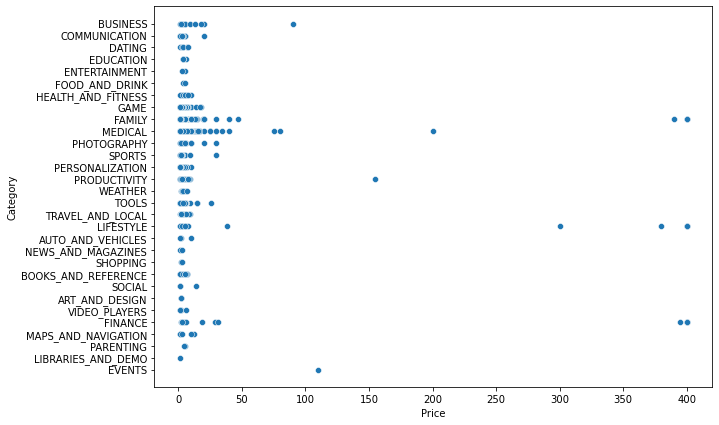

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,y='Category',x='Price')
plt.show()

Family and Medical have the most apps in paid section

In [39]:
paid_apps[paid_apps['Price']>=50] #Apps priced above 50usd

App      Category    Rating  Reviews  \
2253          Vargo Anesthesia Mega App       MEDICAL  4.600000       92   
2390          Language Therapy: Aphasia       MEDICAL  4.166552       10   
4197             most expensive app (H)        FAMILY  4.300000        6   
4362                         💎 I'm rich     LIFESTYLE  3.800000      718   
4367           I'm Rich - Trump Edition     LIFESTYLE  3.600000      275   
5351                          I am rich     LIFESTYLE  3.800000     3547   
5354                     I am Rich Plus        FAMILY  4.000000      856   
5355                      I am rich VIP     LIFESTYLE  3.800000      411   
5356                  I Am Rich Premium       FINANCE  4.100000     1867   
5357                I am extremely Rich     LIFESTYLE  2.900000       41   
5358                         I am Rich!       FINANCE  3.800000       93   
5359                 I am rich(premium)       FINANCE  3.500000      472   
5362                      I Am Rich Pro        FAMILY  4.400000      201   
5364     I am rich (Most expensive app)       FINANCE  4.100000      129   
5366                          I Am Rich        FAMILY  3.600000      217   
5369                          I am Rich       FINANCE  4.300000      180   
5373                 I AM RICH PRO PLUS       FINANCE  4.000000       36   
6624            BP Fitness Lead Scanner        EVENTS  4.435556        0   
6692                      cronometra-br  PRODUCTIVITY  4.183389        0   
9719                       EP Cook Book       MEDICAL  4.166552        0   
9730                            Lean EQ      BUSINESS  4.098479        6   
9917                        Eu Sou Rico       FINANCE  4.115563        0   
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢     LIFESTYLE  4.093355        0   

        Size  Installs  Type   Price Content Rating         Genres  \
2253  32.000      1000  Paid   79.99       Everyone        Medical   
2390  28.000      1000  Paid   74.99       Everyone        Medical   
4197   1.500       100  Paid  399.99       Everyone  Entertainment   
4362  26.000     10000  Paid  399.99       Everyone      Lifestyle   
4367   7.300     10000  Paid  400.00       Everyone      Lifestyle   
5351   1.800    100000  Paid  399.99       Everyone      Lifestyle   
5354   8.700     10000  Paid  399.99       Everyone  Entertainment   
5355   2.600     10000  Paid  299.99       Everyone      Lifestyle   
5356   4.700     50000  Paid  399.99       Everyone        Finance   
5357   2.900      1000  Paid  379.99       Everyone      Lifestyle   
5358  22.000      1000  Paid  399.99       Everyone        Finance   
5359   0.965      5000  Paid  399.99       Everyone        Finance   
5362   2.700      5000  Paid  399.99       Everyone  Entertainment   
5364   2.700      1000  Paid  399.99           Teen        Finance   
5366   4.900     10000  Paid  389.99       Everyone  Entertainment   
5369   3.800      5000  Paid  399.99       Everyone        Finance   
5373  41.000      1000  Paid  399.99       Everyone        Finance   
6624   6.700         1  Paid  109.99       Everyone         Events   
6692   5.400         0  Paid  154.99       Everyone   Productivity   
9719   3.200         0  Paid  200.00       Everyone        Medical   
9730  10.000        10  Paid   89.99       Everyone       Business   
9917   1.400         0  Paid  394.99       Everyone        Finance   
9934  40.000         0  Paid  399.99       Everyone      Lifestyle   

           Last Updated Current Ver   Android Ver  
2253      June 18, 2018        19.0  4.0.3 and up  
2390      June 25, 2018       3.1.1  4.0.3 and up  
4197      July 16, 2018         1.0    7.0 and up  
4362     March 11, 2018       1.0.0    4.4 and up  
4367        May 3, 2018       1.0.1    4.1 and up  
5351   January 12, 2018         2.0  4.0.3 and up  
5354       May 19, 2018         3.0    4.4 and up  
5355      July 21, 2018       1.1.1    4.3 and up  
5356  November 12, 2017         1.6    4.0 and up  
5357      

<AxesSubplot:>

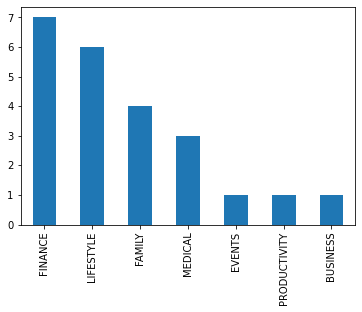

In [40]:
paid_apps[paid_apps['Price']>=50]['Category'].value_counts().plot(kind='bar')

In [41]:
paid_apps['Price'].max() #max price

400.0

In [42]:
paid_apps[paid_apps['Price']==400] #To find the app priced the most

App   Category  Rating  Reviews  Size  Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7.3     10000   

      Type  Price Content Rating     Genres Last Updated Current Ver  \
4367  Paid  400.0       Everyone  Lifestyle  May 3, 2018       1.0.1   

     Android Ver  
4367  4.1 and up

The app "I'm Rich-Trump Edition" is found to be the highest priced app.
It looks like a satire app designed to troll Donald Trump(45th president of USA) which has been to shockingly been downloaded over a 10,000 times given the price of 400usd.

In [43]:
paid_apps['Installs'].max() #to find the most installs

10000000

In [44]:
paid_apps[paid_apps['Installs']==10000000]

App Category  Rating  Reviews       Size  Installs  Type  \
2241      Minecraft   FAMILY     4.5  2376564  27.222893  10000000  Paid   
4034  Hitman Sniper     GAME     4.6   408292  29.000000  10000000  Paid   

      Price Content Rating                     Genres   Last Updated  \
2241   6.99   Everyone 10+  Arcade;Action & Adventure  July 24, 2018   
4034   0.99     Mature 17+                     Action  July 12, 2018   

     Current Ver         Android Ver  
2241     1.5.2.1  Varies with device  
4034  1.7.110758          4.1 and up

Minecraft and Hitman has been downloaded the most in paid section. Minecraft can be considered as the most profitable app based solely on installs and pricing.

### Rating

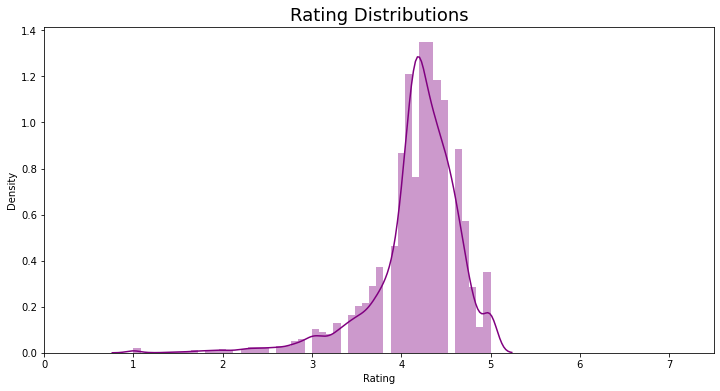

In [45]:
#Rating distribution
plt.figure(figsize=(12,6))
plt.title('Rating Distributions',size = 18)
sns.distplot(df['Rating'],color='purple')
plt.xlim(0,7.5)
plt.show()

Most of the apps are rated around 4 to 4.5

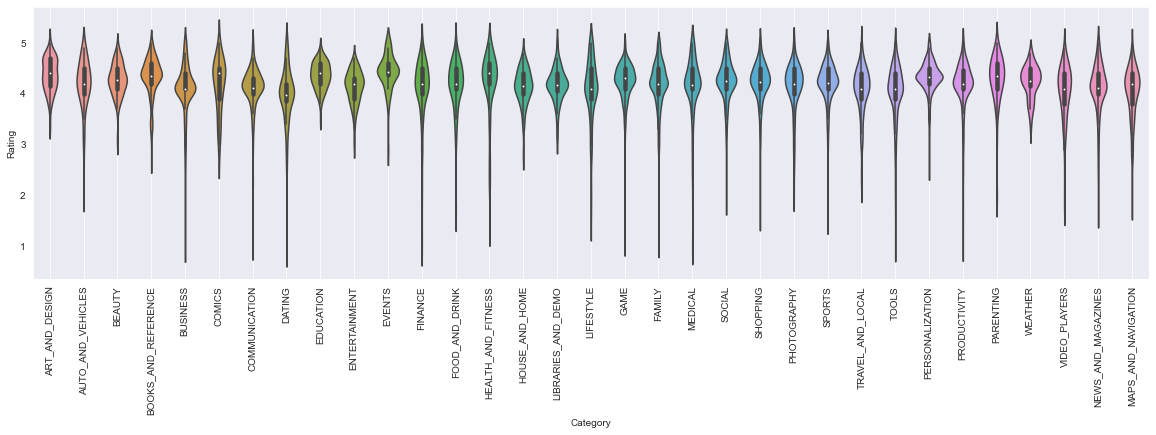

In [46]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")

sns.violinplot(x="Category",y="Rating",data=df)
plt.xticks(rotation=90)
plt.grid()
plt.show()

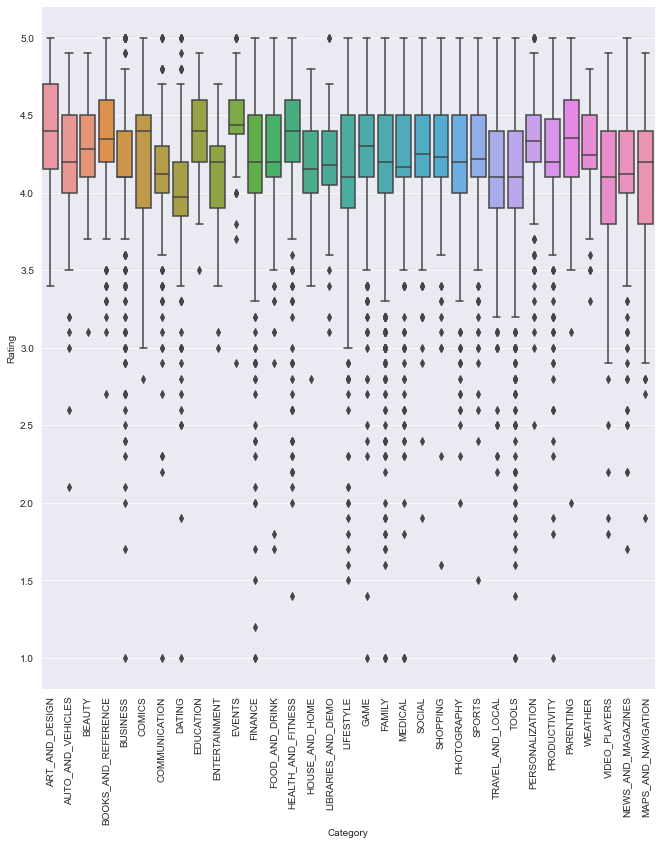

In [47]:
sns.catplot(x="Category",y="Rating",data=df, kind="box",height=10)
plt.xticks(rotation=90)
plt.show()

Category wise the ratings do not differ much

#### Top 5 Categories based on Ratings (min. 10,000 downloads)

In [48]:
apps_with_10k = df[df['Installs']>=10000] #Filtering apps having installs equal to or greater than 10k

In [49]:
category_grp10k = apps_with_10k.groupby(['Category']) #Grouping the apps by their respective categories

In [50]:
category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:5] #Getting the top 5 categories

Category
BOOKS_AND_REFERENCE    4.370118
EDUCATION              4.356961
ART_AND_DESIGN         4.343655
EVENTS                 4.338354
PARENTING              4.325455
Name: Rating, dtype: float64

In [51]:
fig2 = px.line(category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:5],markers=True)
fig2.show()

Top 5 Category based on ratings and having minimum 10k installs are :
1. Books and Reference
2. Education
3. Art and Design
4. Events
5. Parenting

### Genres

In [52]:
df['Genres'].nunique()

118

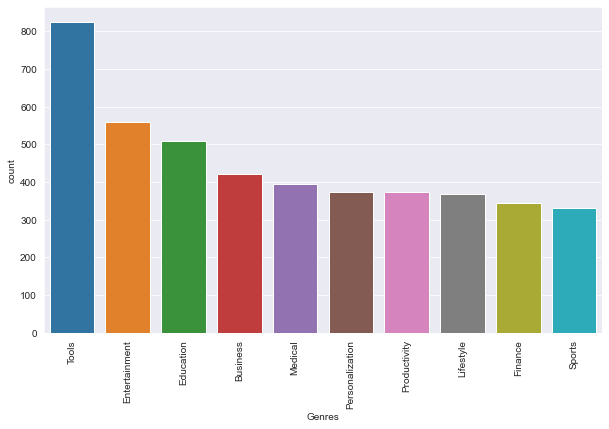

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Genres'],order=pd.value_counts(df['Genres']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Out of 118 genres the most frequent are Tools, Entertainment, Education

#### Top 5 Genres based on ratings and having >= 10k Installs

In [54]:
gen_grp10k = apps_with_10k.groupby(['Genres'])

In [55]:
gen_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:5]

Genres
Comics;Creativity              4.8
Health & Fitness;Education     4.7
Books & Reference;Education    4.7
Strategy;Action & Adventure    4.6
Adventure;Brain Games          4.6
Name: Rating, dtype: float64

In [56]:
fig3 = px.line(gen_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:5],markers=True)
fig3.show()

Comics;Creativity is the highest rated genre followed by Health & Fitness;Education and Books & Reference

### Android Version

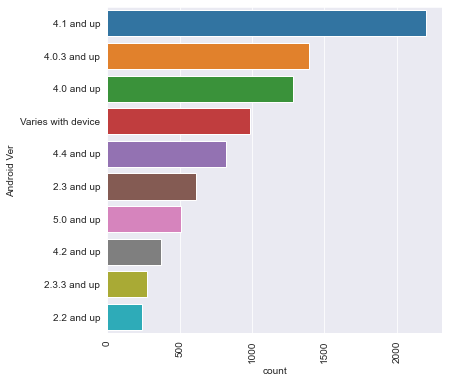

In [57]:
#Android version compatibility
plt.figure(figsize=(6,6))
sns.countplot(y=df['Android Ver'],order=pd.value_counts(df['Android Ver']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Most of the apps are made compatible with Android version 4(Jellybean) and above

### Reviews

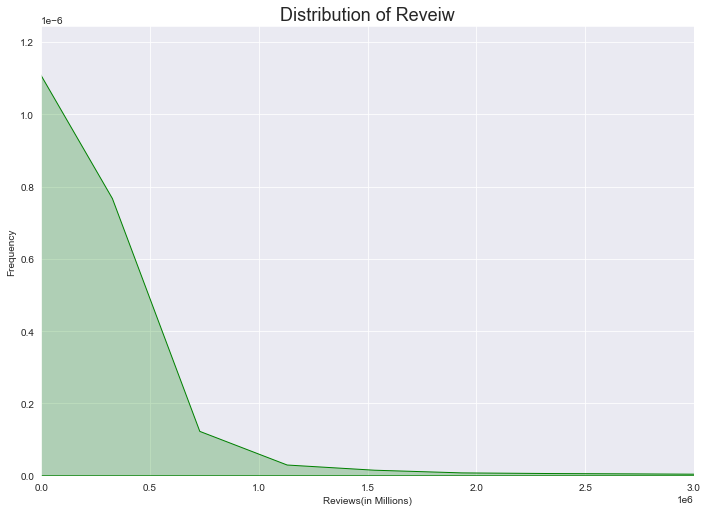

In [58]:
plt.figure(figsize=(11.7,8.27))
sns.kdeplot(df.Reviews, color="Green", shade = True)
plt.xlabel("Reviews(in Millions)")
plt.ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 18)
plt.xlim(0,0.3e7)
plt.show()

Most of the apps in the store have less than 1M in reviews

### Rating VS Review

In [59]:
fig4 = px.scatter(df, x='Reviews', y='Rating', opacity=0.65,
           trendline='ols', trendline_color_override='darkblue',width=600, height=450
)
fig4.show()

Generally, higher rated apps have high number of review count

### App Size

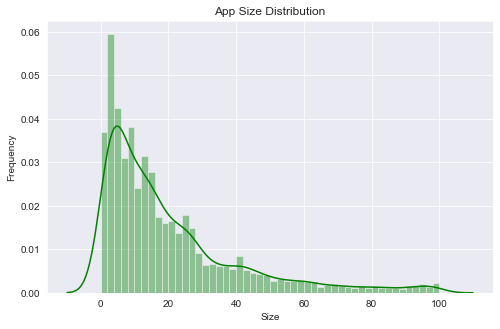

In [60]:
plt.figure(figsize=(8,5))
sns.distplot(df['Size'],color='green')
plt.title('App Size Distribution')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Many of the apps lie in 0-20 mb range
(df[df['Size']<=20].shape[0]/df['Size'].shape[0])*100 #Percentage of apps less than or equal to 20mb

64.98756218905473

~65% of the apps come under 0-20 mb in size range

### Top Categories based on Installs(having maximum Installs)

In [62]:
df['Installs'].max()

1000000000

In [63]:
most_installs=df[df['Installs']==1000000000] #1bill is found to be the maximum no. of installs

In [64]:
most_installs['App'].nunique()

20

In [65]:
#20 apps are found to be downloaded the most
fig5 = px.pie(most_installs,names=most_installs['Category'])
fig5.show()

30% of the Apps downloaded the most(1billion+ installs) are found to be belonging to the Communication Category

In [66]:
most_installs[most_installs['Category']=='COMMUNICATION']

App       Category  Rating  \
335  Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
336                        WhatsApp Messenger  COMMUNICATION     4.4   
338              Google Chrome: Fast & Secure  COMMUNICATION     4.3   
340                                     Gmail  COMMUNICATION     4.3   
341                                  Hangouts  COMMUNICATION     4.0   
391             Skype - free IM & video calls  COMMUNICATION     4.1   

      Reviews      Size    Installs  Type  Price Content Rating  \
335  56642847  11.30743  1000000000  Free    0.0       Everyone   
336  69119316  11.30743  1000000000  Free    0.0       Everyone   
338   9642995  11.30743  1000000000  Free    0.0       Everyone   
340   4604324  11.30743  1000000000  Free    0.0       Everyone   
341   3419249  11.30743  1000000000  Free    0.0       Everyone   
391  10484169  11.30743  1000000000  Free    0.0       Everyone   

            Genres    Last Updated         Current Ver         Android Ver  
335  Communication  August 1, 2018  Varies with device  Varies with device  
336  Communication  August 3, 2018  Varies with device  Varies with device  
338  Communication  August 1, 2018  Varies with device  Varies with device  
340  Communication  August 2, 2018  Varies with device  Varies with device  
341  Communication   July 21, 2018  Varies with device  Varies with device  
391  Communication  August 3, 2018  Varies with device  Varies with device

## User Reviews Sentiment Analysis

In [67]:
reviews_data = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\User Reviews.csv')

In [68]:
reviews_data.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [69]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [70]:
reviews_data.isna().sum() #Many null values

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [71]:
((reviews_data.isna().sum()[1])/reviews_data.shape[0])*100 # ~42% null values in 3 columns

41.7886305311455

### Merging Datasets

In [72]:
df_merged = pd.merge(df, reviews_data, on = "App", how = "inner") #Merging both datasets on App

In [73]:
df_merged = df_merged.dropna(subset=['Translated_Review', 'Sentiment']) #Dropping null values

In [74]:
df_merged.head()

App        Category  Rating  Reviews  Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
5  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
5    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2       2.0.0  4.0.3 and up   
4       2.0.0  4.0.3 and up   
5       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
4                           I love colors inspyering  Positive   
5                                             I hate  Negative   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
4               0.500                0.600000  
5              -0.800                0.900000

### Sentiment Polarity Between Free and Paid Apps

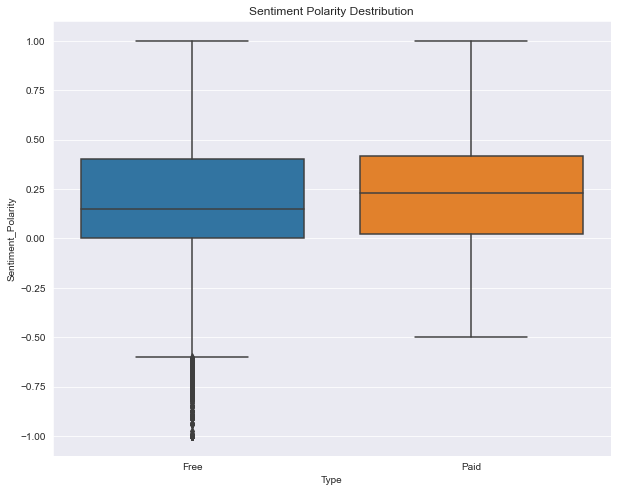

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=df_merged)
plt.title('Sentiment Polarity Destribution')
plt.show()

Free apps relatively recieve more negative comments(outliers on the negative Y-axis) than paid apps.

### Sentiment Analysis Category wise

In [76]:
fig6 = px.sunburst(df_merged, path=['Category', 'Sentiment'],color='Sentiment',color_discrete_sequence=px.colors.qualitative.Pastel,
                 title='Sentiment Analysis',width=1000, height=800)
fig6.update_traces(textinfo='label+percent entry')
fig6.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig6.show()

Health and Fitness apps perform the best, having 78% positive reviews.
On the contrary, many Game and Social apps perform bad leading to 50% positive and 50% negative.

### WORDCLOUD

In [77]:
from wordcloud import WordCloud,STOPWORDS #importing wordcloud library

In [78]:
stopwords = set(STOPWORDS)

In [79]:
#separating the merged data into negative and positive dataframe
negative_df = df_merged[df_merged['Sentiment']=='Negative'] 
postive_df = df_merged[df_merged['Sentiment']=='Positive']

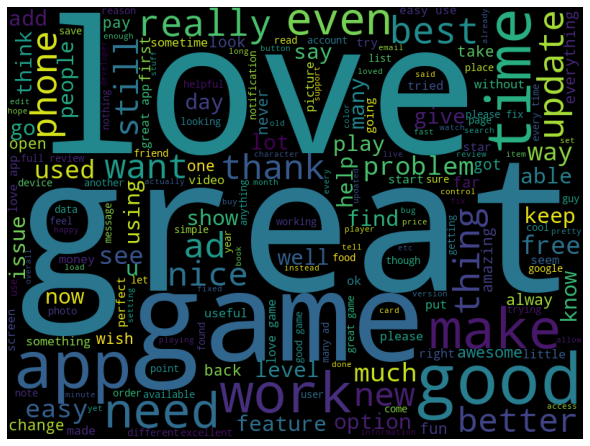

In [80]:
#To generate wordcloud image fo positive reviews
words = ''
for s in postive_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

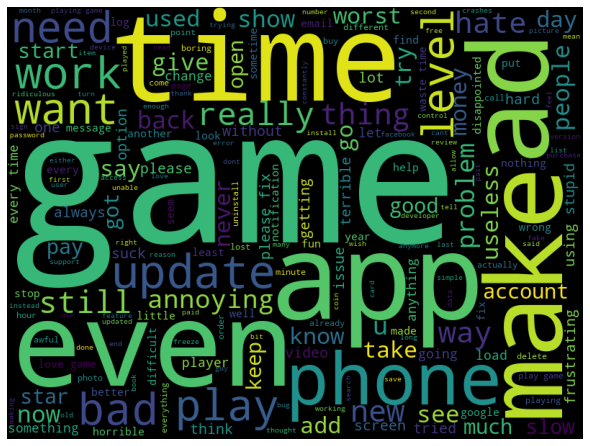

In [81]:
#To generate wordcloud image for negative reviews
words = ''
for s in negative_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Positive Reviews**: "great, love, thank, good"<br>
**Negative Reviews**: "ad, update,hate,bad"